In [1]:
# Tabla de datos

import pandas as pd
import os

dataBol=pd.read_excel(os.path.join('data','dataBolivia_indicadores.xlsx'))
dataBol.head()

,DEPARTAMENTO,PROVINCIA,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES
0,CHUQUISACA,Oropeza,77376,3.62,87.08,10829
1,CHUQUISACA,Azurduy,5956,4.11,27.50,983
2,CHUQUISACA,Zudáñez,9116,4.21,48.96,1156
3,CHUQUISACA,Tomina,9217,3.77,46.23,1640
4,CHUQUISACA,Hernando Siles,8158,3.84,63.67,1554


In [2]:
# Mapa

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

dataBolmap=gpd.read_file(os.path.join('maps','Provincias.zip'))

dataBolmap.head()

,id,c_ut,DEPARTAMEN,PROVINCIA,geometry
0,0,0313,Cochabamba,Mizque,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6..."
1,1,0701,Santa Cruz,Andrés Ibáñez,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0..."
2,2,0409,Oruro,Sabaya,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3..."
3,3,0501,Potosí,Tomás Frías,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9..."
4,4,0404,Oruro,Sajama,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6..."


In [3]:
# Preprocessing
capitalizeColumns=lambda x: x.str.upper().str.strip()
dataBol[['DEPARTAMENTO','PROVINCIA']]=dataBol[['DEPARTAMENTO','PROVINCIA']].apply(capitalizeColumns)
dataBolmap[['DEPARTAMEN','PROVINCIA']]=dataBolmap[['DEPARTAMEN','PROVINCIA']].apply(capitalizeColumns)

In [4]:
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
dataBol[['DEPARTAMENTO','PROVINCIA']]=dataBol[['DEPARTAMENTO','PROVINCIA']].applymap(byePunctuation)
dataBolmap[['DEPARTAMEN','PROVINCIA']]=dataBolmap[['DEPARTAMEN','PROVINCIA']].applymap(byePunctuation)

In [5]:
len(dataBol.PROVINCIA),len(dataBolmap.PROVINCIA)

(112, 112)

In [6]:
dataBol.PROVINCIA.duplicated().sum(),dataBolmap.PROVINCIA.duplicated().sum()

(3, 3)

In [7]:
# concatenating

dataBol['provDist']=["+".join(pd) for pd in zip (dataBol.DEPARTAMENTO,dataBol.PROVINCIA)]
dataBolmap['provDist']=["+".join(pd) for pd in zip (dataBolmap.DEPARTAMEN,dataBolmap.PROVINCIA)]

In [8]:
# the new column looks like this:

dataBol['provDist'].head()

0           CHUQUISACA+OROPEZA
1           CHUQUISACA+AZURDUY
2           CHUQUISACA+ZUDANEZ
3            CHUQUISACA+TOMINA
4    CHUQUISACA+HERNANDO SILES
Name: provDist, dtype: object

In [9]:
# replacing dashes and multiple spaces by a simple space

dataBol.provDist=dataBol.provDist.str.replace("\-|\_|\s+"," ",regex=True)
dataBolmap.provDist=dataBolmap.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [10]:
dataBol

,DEPARTAMENTO,PROVINCIA,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES,provDist
0,CHUQUISACA,OROPEZA,77376,3.62,87.08,10829,CHUQUISACA+OROPEZA
1,CHUQUISACA,AZURDUY,5956,4.11,27.50,983,CHUQUISACA+AZURDUY
2,CHUQUISACA,ZUDANEZ,9116,4.21,48.96,1156,CHUQUISACA+ZUDANEZ
3,CHUQUISACA,TOMINA,9217,3.77,46.23,1640,CHUQUISACA+TOMINA
4,CHUQUISACA,HERNANDO SILES,8158,3.84,63.67,1554,CHUQUISACA+HERNANDO SILES
...,...,...,...,...,...,...,...
107,PANDO,NICOLAS SUAREZ,15448,3.68,86.21,1888,PANDO+NICOLAS SUAREZ
108,PANDO,MANURIPI,3420,4.14,55.00,277,PANDO+MANURIPI
109,PANDO,MADRE DE DIOS,4021,5.66,41.13,362,PANDO+MADRE DE DIOS
110,PANDO,ABUNA,955,3.98,64.40,87,PANDO+ABUNA


In [11]:
dataBolmap

,id,c_ut,DEPARTAMEN,PROVINCIA,geometry,provDist
0,0,0313,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE
1,1,0701,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ
2,2,0409,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA
3,3,0501,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS
4,4,0404,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA
...,...,...,...,...,...,...
107,107,0803,BENI,GENERAL JOSE BALLIVIAN,"POLYGON ((-66.26304 -12.00437, -66.26249 -12.0...",BENI+GENERAL JOSE BALLIVIAN
108,108,0603,TARIJA,GRAN CHACO,"POLYGON ((-63.69855 -21.39569, -63.69823 -21.3...",TARIJA+GRAN CHACO
109,109,0405,ORURO,LITORAL,"POLYGON ((-67.93301 -18.83585, -67.92465 -18.8...",ORURO+LITORAL
110,110,0219,LA PAZ,GENERAL JOSE MANUEL PANDO,"POLYGON ((-69.46790 -17.41525, -69.46917 -17.3...",LA PAZ+GENERAL JOSE MANUEL PANDO


In [12]:
# EJERCICIO: 1

In [13]:
nomatch_df=set(dataBol.provDist)- set(dataBolmap.provDist)
nomatch_gdf=set(dataBolmap.provDist)-set(dataBol.provDist) 

In [14]:
len(nomatch_df), len(nomatch_gdf)

(10, 10)

In [15]:
# pick the closest match from nomatch_gdf for a value in nomatch_df

from thefuzz import process

[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('BENI+JOSE BALLIVIAN', ('BENI+GENERAL JOSE BALLIVIAN', 95)),
 ('CHUQUISACA+SUD CINTI', ('CHUQUISACA+SUR CINTI', 95)),
 ('COCHABAMBA+ESTEBAN ARCE', ('COCHABAMBA+ESTEBAN ARZE', 96)),
 ('LA PAZ+JOSE MANUEL PANDO', ('LA PAZ+GENERAL JOSE MANUEL PANDO', 95)),
 ('POTOSI+BERNARDINO BILBAO RIOJA', ('POTOSI+SUR LIPEZ', 86)),
 ('POTOSI+SUD CHICHAS', ('POTOSI+SUR CHICHAS', 94)),
 ('POTOSI+SUD LIPEZ', ('POTOSI+SUR LIPEZ', 94)),
 ('SANTA CRUZ+OBISPO SANTISTEVAN', ('SANTA CRUZ+OBISPO SANTISTEBAN', 97)),
 ('TARIJA+ANICETO ARCE', ('TARIJA+ARCE', 86)),
 ("TARIJA+BURNET O'CONNOR", ("TARIJA+O'CONNOR", 95))]

In [16]:
# is this OK?

{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'BENI+JOSE BALLIVIAN': 'BENI+GENERAL JOSE BALLIVIAN',
 'CHUQUISACA+SUD CINTI': 'CHUQUISACA+SUR CINTI',
 'COCHABAMBA+ESTEBAN ARCE': 'COCHABAMBA+ESTEBAN ARZE',
 'LA PAZ+JOSE MANUEL PANDO': 'LA PAZ+GENERAL JOSE MANUEL PANDO',
 'POTOSI+BERNARDINO BILBAO RIOJA': 'POTOSI+SUR LIPEZ',
 'POTOSI+SUD CHICHAS': 'POTOSI+SUR CHICHAS',
 'POTOSI+SUD LIPEZ': 'POTOSI+SUR LIPEZ',
 'SANTA CRUZ+OBISPO SANTISTEVAN': 'SANTA CRUZ+OBISPO SANTISTEBAN',
 'TARIJA+ANICETO ARCE': 'TARIJA+ARCE',
 "TARIJA+BURNET O'CONNOR": "TARIJA+O'CONNOR"}

In [17]:
# then:

changes_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [18]:
# Now, make the replacements:

dataBol.provDist.replace(changes_df,inplace=True)

In [19]:
# Now the merge can happen:

dataBolmap=dataBolmap.merge(dataBol, on='provDist')

In [20]:
# check

dataBolmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   id                                              112 non-null    int64   
 1   c_ut                                            112 non-null    object  
 2   DEPARTAMEN                                      112 non-null    object  
 3   PROVINCIA_x                                     112 non-null    object  
 4   geometry                                        112 non-null    geometry
 5   provDist                                        112 non-null    object  
 6   DEPARTAMENTO                                    112 non-null    object  
 7   PROVINCIA_y                                     112 non-null    object  
 8   TOTAL_VIVIENDAS                                 112 non-null    int64   
 9   TAMAÑO_PROMEDIO_DEL_HOGA

In [21]:
# We can get rid of some columns:

bye=['id','c_ut','DEPARTAMENTO', 'PROVINCIA_y']
dataBolmap.drop(columns=bye,inplace=True)

# keeping
dataBolmap.head()

,DEPARTAMEN,PROVINCIA_x,geometry,provDist,TOTAL_VIVIENDAS,TAMAÑO_PROMEDIO_DEL_HOGAR,PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA,PERSONAS_CON_DIFICULTADES_PERMANENTES
0,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE,10573,3.35,45.12,944
1,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ,410289,3.94,98.04,55686
2,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA,3090,3.45,74.60,404
3,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS,63169,3.59,86.52,6638
4,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA,2911,3.11,63.38,555


In [26]:
# Cambiamos los nombres para que sean más cómodos de usar
nuevos_nombres = {'DEPARTAMEN': 'DEPARTAMENTO', 'PROVINCIA_x': 'PROVINCIA','provDist': 'DepPro', 'TOTAL_VIVIENDAS':'TotalViviendas', 'TAMAÑO_PROMEDIO_DEL_HOGAR':'TamañoHogar', 'PORCENTAJE_ DE_VIVIENDAS_CON_ENERGIA_ELECTRICA':'ViviendasConEnegía', 'PERSONAS_CON_DIFICULTADES_PERMANENTES':'PersonasConDificultadesPerma'}
dataBolmap.rename(columns=nuevos_nombres, inplace=True)
dataBolmap.head()

,DEPARTAMENTO,PROVINCIA,geometry,DepPro,TotalViviendas,TamañoHogar,ViviendasConEnegía,PersonasConDificultadesPerma
0,COCHABAMBA,MIZQUE,"POLYGON ((-65.61829 -17.67455, -65.59538 -17.6...",COCHABAMBA+MIZQUE,10573,3.35,45.12,944
1,SANTA CRUZ,ANDRES IBANEZ,"POLYGON ((-62.97381 -18.02444, -63.08615 -18.0...",SANTA CRUZ+ANDRES IBANEZ,410289,3.94,98.04,55686
2,ORURO,SABAYA,"POLYGON ((-68.47194 -19.35205, -68.47718 -19.3...",ORURO+SABAYA,3090,3.45,74.60,404
3,POTOSI,TOMAS FRIAS,"POLYGON ((-65.87315 -18.97139, -65.86752 -18.9...",POTOSI+TOMAS FRIAS,63169,3.59,86.52,6638
4,ORURO,SAJAMA,"POLYGON ((-68.47914 -18.61758, -68.48010 -18.6...",ORURO+SAJAMA,2911,3.11,63.38,555


In [27]:
# We can save this gdf:

dataBolmap.to_file(os.path.join('maps',"dataMapBolivia.gpkg"), layer='provincias', driver="GPKG")

In [28]:
# EJERCICIO: 2

In [36]:
# statistics

dataBolmap.ViviendasConEnegía.describe()

count    112.000000
mean      67.686429
std       16.736859
min       26.310000
25%       56.582500
50%       67.130000
75%       80.437500
max       98.040000
Name: ViviendasConEnegía, dtype: float64

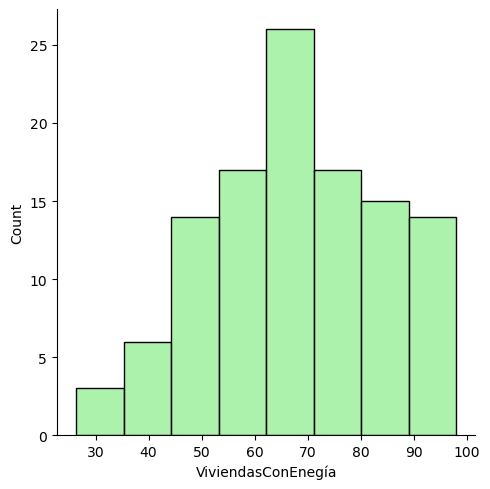

In [37]:
import seaborn as sea

sea.displot(dataBolmap.ViviendasConEnegía, color='lightgreen')

<Axes: >

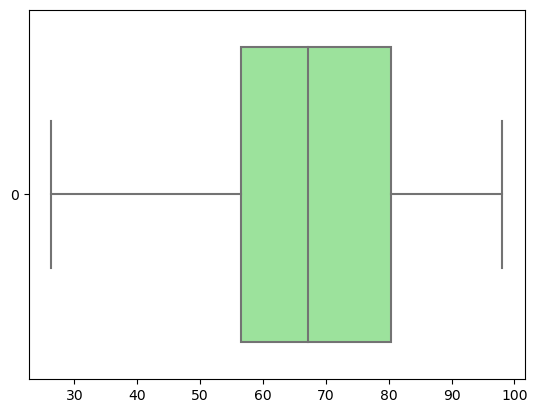

In [38]:
sea.boxplot(dataBolmap.ViviendasConEnegía, color='lightgreen',orient='h')